1)Постройте график зависимости весов всех признаков от lambda в L2-регуляризации на основе данных из урока.

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

In [75]:
# 1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод


X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]
print(X)
print(y)

[[   1    1  500    1]
 [   1    1  700    1]
 [   1    2  750    2]
 [   1    5  600    1]
 [   1    3 1450    2]
 [   1    0  800    1]
 [   1    5 1500    3]
 [   1   10 2000    3]
 [   1    1  450    1]
 [   1    2 1000    2]]
[45, 55, 50, 55, 60, 35, 75, 80, 50, 60]


In [76]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [77]:
def standard_scale(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

In [78]:
X_st = X.copy().astype(np.float64)
X_st[:, 1:4] = standard_scale(X_st[:, 1:4])
X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [79]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred) ** 2)
    return err

In [80]:
values = {}
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):#0,00000001
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        W -= eta * (dQ + dReg)
        
    values[reg] = W
    return W

In [81]:
gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-1, reg=1e-4)

array([56.49717514,  6.30234588, -0.35437787,  6.5698973 ])

In [82]:
for i in [0.0001, 0.001, 0.01, 0.1]:
    gradient_descent_reg_l2(X_st, y, iterations=2000, eta=1e-1, reg=i)

In [83]:
values

{0.0001: array([56.49717514,  6.30234588, -0.35437787,  6.5698973 ]),
 0.001: array([56.47176412,  6.29563963, -0.33636842,  6.55575571]),
 0.01: array([56.21890547,  6.23069221, -0.16470894,  6.42099175]),
 0.1: array([53.80952381,  5.73058923,  0.98368247,  5.51609991])}

In [84]:
df = pd.DataFrame.from_dict(values)

In [85]:
df2 = df.T
df2

,0,1,2,3
0.0001,56.497175,6.302346,-0.354378,6.569897
0.0010,56.471764,6.295640,-0.336368,6.555756
0.0100,56.218905,6.230692,-0.164709,6.420992
0.1000,53.809524,5.730589,0.983682,5.516100


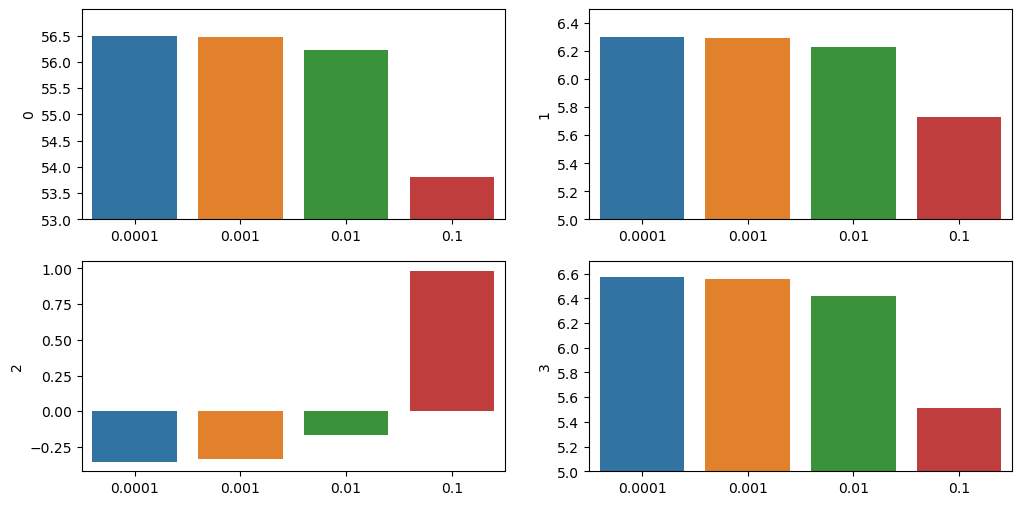

In [86]:
plt.figure(figsize=(12, 6))

plt.subplot(2,2,1)

sns.barplot(data = df2, x = df2.index, y = df2.iloc[:,0])
plt.ylim(53, 57)
plt.yticks(np.arange(53,57,0.5))

plt.subplot(2,2,2)

sns.barplot(data = df2, x = df2.index, y = df2.iloc[:,1])
plt.ylim(5, 6.5)
plt.yticks(np.arange(5,6.5,0.2))

plt.subplot(2,2,3)

sns.barplot(data = df2, x = df2.index, y = df2.iloc[:,2])

plt.subplot(2,2,4)

sns.barplot(data = df2, x = df2.index, y = df2.iloc[:,3])
plt.ylim(5, 6.7)
plt.yticks(np.arange(5,6.7,0.2))

plt.show()

2)Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?
Нет. Это бессмысленно.
Нормализация данных это приведение их к общему распределению в диапазоне от 0 до 1
Стандартизация это приведение данных к единому формату распределения где 0 это среднее, а 1 это разброс. 
В нормализации 0 будет наименьшим значением, в стандартизации 0 будет средним.

In [88]:
np.sign(0)

0

In [89]:
def gradient_descent_reg_l1(X, y, iterations, eta=0.0001, reg=0.0000001):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W) # градиент регуляризации, через L1 норму
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [90]:
gradient_descent_reg_l1(X_st, y, iterations=200, eta=0.1, reg=0.01)

Iter: 0, weights: [11.63363551  1.72934924  2.41368224  2.60421809], error 3290.4133067476796
Iter: 20, weights: [55.97778368  5.16660746  2.50813757  4.71888504], error 26.81898234405686
Iter: 40, weights: [56.4890369   5.76218054  1.47286483  5.21025886], error 25.49895687621677
Iter: 60, weights: [56.49493125  6.00667492  0.8345854   5.63010926], error 25.160044626123856
Iter: 80, weights: [56.49499921  6.12440391  0.42592162  5.93590048], error 25.01621774585611
Iter: 100, weights: [56.49499999  6.18933936  0.15948089  6.14653381], error 24.953570670133633
Iter: 120, weights: [ 5.64950000e+01  6.22818203e+00 -1.20923108e-02  6.28802872e+00], error 24.92626153560566
Iter: 140, weights: [56.495       6.24503033 -0.10756644  6.37052696], error 24.91579051060799
Iter: 160, weights: [56.495       6.25728097 -0.17138032  6.42412055], error 24.91075650128412
Iter: 180, weights: [56.495       6.26577078 -0.2137427   6.45935782], error 24.908252047952608
Final MSE: 24.906957166266672


array([56.495     ,  6.27126756, -0.24067419,  6.48166482])

немного работы с параметрами штрафа и количеством итераций